In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape the images to add the channel dimension (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize the pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential()

# Add Convolutional layers and MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Fully Connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(train_images, train_labels,epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.7003 - loss: 0.8185 - val_accuracy: 0.8584 - val_loss: 0.3976
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.8600 - loss: 0.3884 - val_accuracy: 0.8765 - val_loss: 0.3447
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.8837 - loss: 0.3170 - val_accuracy: 0.8792 - val_loss: 0.3234
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.8956 - loss: 0.2838 - val_accuracy: 0.8903 - val_loss: 0.3032
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9060 - loss: 0.2537 - val_accuracy: 0.9013 - val_loss: 0.2759
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.9147 - loss: 0.2321 - val_accuracy: 0.9023 - val_loss: 0.2831
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 77ms/step - accuracy: 0.9210 - loss: 0.2133 - val_accuracy: 0.8971 - val_loss: 0.2844
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9248 - loss: 0.2032 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9032 - loss: 0.2789
Test accuracy: 0.9046000242233276
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.93      0.89      0.91      1000
           4       0.88      0.83      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.74      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



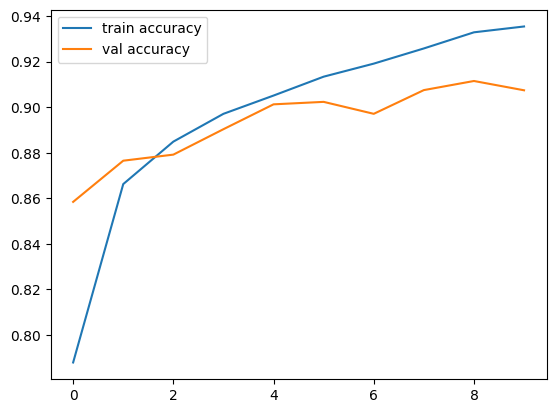

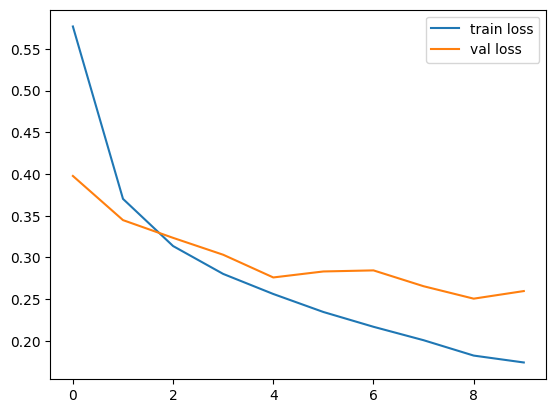

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate confusion matrix
y_pred = predictions.argmax(axis=1)
y_true = test_labels.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred))

# Plotting accuracy and loss curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()